In [8]:
#import library
import numpy as np  #Mengimport library numpy untuk manipulasi array
import matplotlib.pyplot as plt  #Mengimport library matplotlib untuk visualisasi gambar
#matplotlib inline
import cv2 #Mengimport library OpenCV untuk pemrosesan gambar
import matplotlib.image as mpimg #Mengimport library matplotlib untuk membaca gambar
from skimage import data #Mengimport library skimage untuk mendapatkan data gambar bawaan

In [9]:
image = cv2.imread("aku.jpeg", cv2.IMREAD_GRAYSCALE) #Membaca gambar dengan nama file "aku.jpeg" menggunakan fungsi cv2.imread() dan menyimpannya dalam variabel image

In [10]:
image_equalized = cv2.equalizeHist(image) #Melakukan equalisasi histogram pada gambar menggunakan fungsi cv2.equalizeHist() dan menyimpannya dalam variabel image_equalized

In [11]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) #Membuat objek CLAHE (Contrast Limited Adaptive Histogram Equalization) dengan batasan klip sebesar 2 dan ukuran grid tile 8x8 menggunakan fungsi cv2.createCLAHE() dan menyimpannya dalam variabel clahe

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)

In [12]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# Apply Min-Max Contrasting
min = np.min(image) #Menemukan nilai piksel minimum dalam gambar menggunakan fungsi np.min(). Nilai ini disimpan dalam variabel min.
max = np.max(image) #Menemukan nilai piksel maksimum dalam gambar menggunakan fungsi np.max(). Nilai ini disimpan dalam variabel max.

for i in range(image.shape[0]): #Looping untuk setiap baris dalam gambar
    for j in range(image.shape[1]): #Looping untuk setiap kolom dalam gambar
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min) #Mengaplikasikan rumus Min-Max Contrasting pada setiap piksel gambar. Nilai piksel diubah sesuai dengan rumus yang diberikan dan disimpan dalam array image_cs.

In [13]:
copyCamera = image.copy().astype(float)  #Membuat salinan gambar menggunakan metode copy() dan mengubah tipe datanya menjadi float. Salinan ini disimpan dalam variabel copyCamera.

m1,n1 = copyCamera.shape  #Mengambil ukuran gambar salinan menggunakan metode shape. Ukuran baris disimpan dalam variabel m1 dan ukuran kolom disimpan dalam variabel n1.

output1 = np.empty([m1, n1])  #Membuat array kosong dengan ukuran yang sama dengan gambar salinan menggunakan np.empty(). Array ini akan digunakan untuk menyimpan output.

for baris in range(0, m1-1):  #Looping untuk setiap baris dalam gambar salinan
    for kolom in range(0, n1-1):  #Looping untuk setiap kolom dalam gambar salinan
        a1 = baris  #Variabel a1 diisi dengan nilai baris saat ini
        b1 = kolom  #Variabel b1 diisi dengan nilai kolom saat ini
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9  #Mengalikan nilai piksel pada gambar salinan dengan faktor 1.9 dan menyimpan hasilnya dalam array output1 pada posisi (a1, b1).

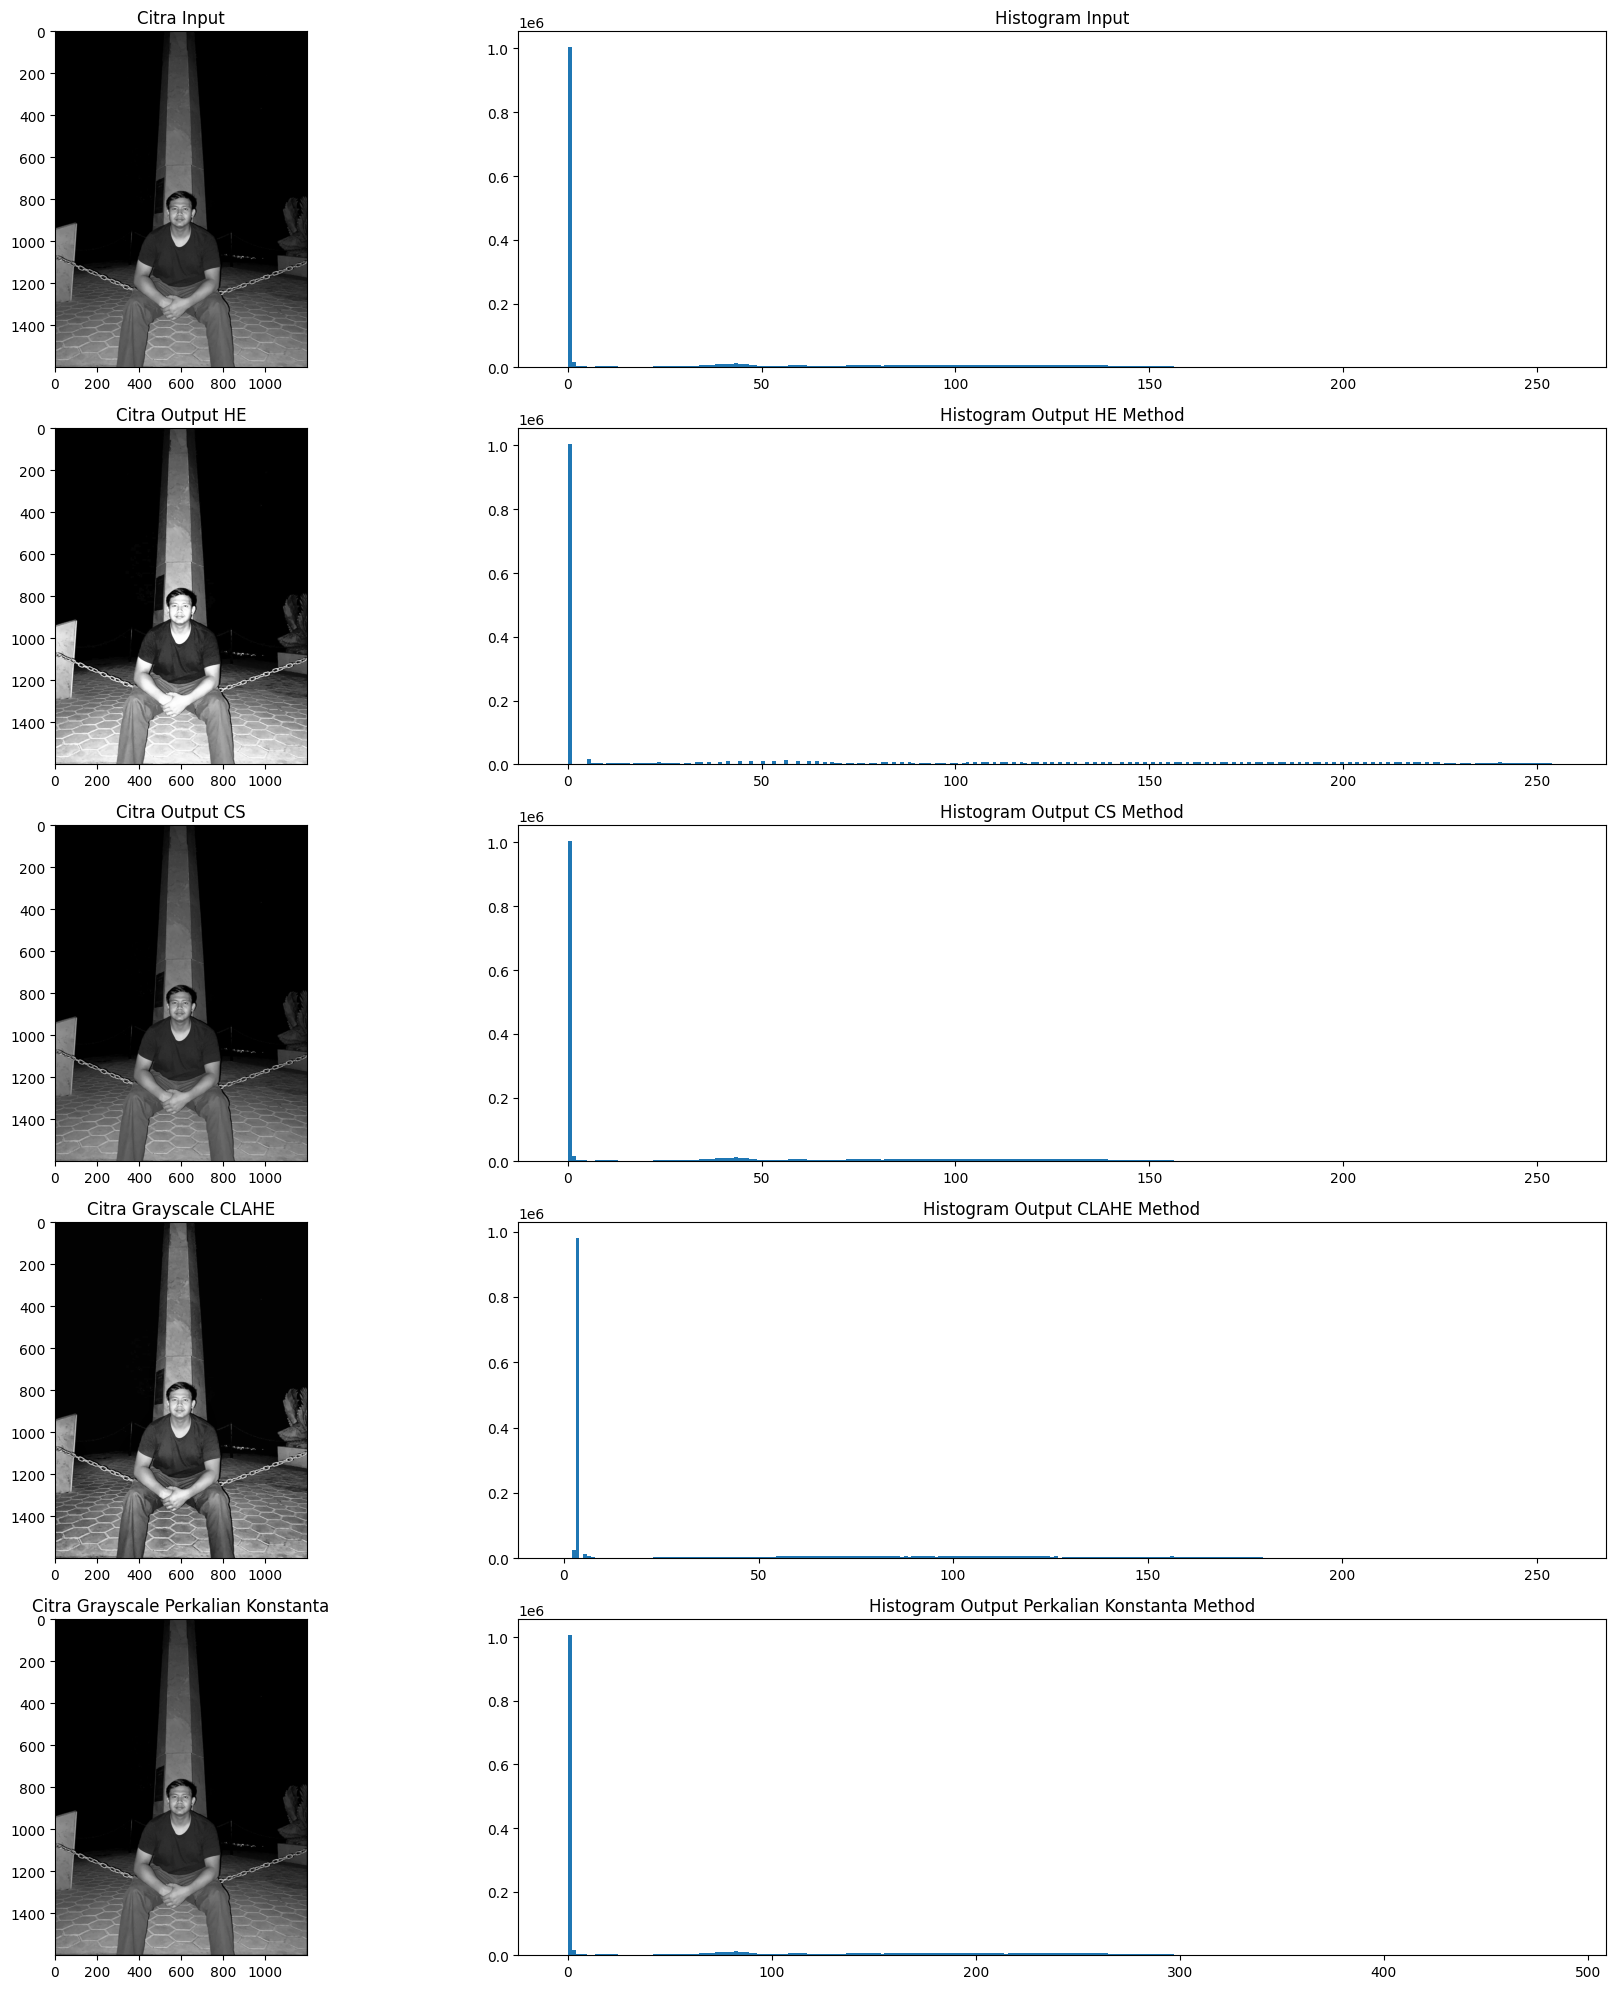

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))  #Membuat subplots dengan ukuran 5 baris dan 2 kolom, dan mengatur ukuran keseluruhan gambar menjadi 20x20. Hasilnya disimpan dalam variabel fig dan axes.

ax = axes.ravel()  #Mengubah array 2D dari axes menjadi array 1D menggunakan metode ravel(). Hasilnya disimpan dalam variabel ax.

ax[0].imshow(image, cmap=plt.cm.gray)  #Menampilkan gambar asli dalam axes pertama (indeks 0) menggunakan imshow() dengan peta warna gray.
ax[0].set_title("Citra Input")  #Mengatur judul untuk axes pertama.
ax[1].hist(image.ravel(), bins=256)  #Menampilkan histogram gambar asli dalam axes kedua (indeks 1) menggunakan fungsi hist() dengan jumlah bin sebesar 256.
ax[1].set_title('Histogram Input')  #Mengatur judul untuk axes kedua.

ax[2].imshow(image_equalized, cmap=plt.cm.gray)  #Menampilkan citra hasil ekualisasi histogram dalam axes ketiga (indeks 2) menggunakan imshow() dengan peta warna gray.
ax[2].set_title("Citra Output HE")  #Mengatur judul untuk axes ketiga.
ax[3].hist(image_equalized.ravel(), bins=256)  #Menampilkan histogram citra hasil ekualisasi histogram dalam axes keempat (indeks 3) menggunakan fungsi hist() dengan jumlah bin sebesar 256.
ax[3].set_title('Histogram Output HE Method')  #Mengatur judul untuk axes keempat.

ax[4].imshow(image_cs, cmap=plt.cm.gray)  #Menampilkan citra hasil kontras-stretching dalam axes kelima (indeks 4) menggunakan imshow() dengan peta warna gray.
ax[4].set_title("Citra Output CS")  #Mengatur judul untuk axes kelima.
ax[5].hist(image_cs.ravel(), bins=256)  #Menampilkan histogram citra hasil kontras-stretching dalam axes keenam (indeks 5) menggunakan fungsi hist() dengan jumlah bin sebesar 256.
ax[5].set_title('Histogram Output CS Method')  #Mengatur judul untuk axes keenam.

ax[6].imshow(image_clahe, cmap=plt.cm.gray)  #Menampilkan citra hasil CLAHE dalam axes ketujuh (indeks 6) menggunakan imshow() dengan peta warna gray.
ax[6].set_title("Citra Grayscale CLAHE")  #Mengatur judul untuk axes ketujuh.
ax[7].hist(image_clahe.ravel(), bins=256)  #Menampilkan histogram citra hasil CLAHE dalam axes kedelapan (indeks 7) menggunakan fungsi hist() dengan jumlah bin sebesar 256.
ax[7].set_title('Histogram Output CLAHE Method')  #Mengatur judul untuk axes kedelapan.


ax[8].imshow(output1, cmap=plt.cm.gray)  #Menampilkan citra hasil perkalian konstanta (`output1`) dalam axes kesembilan (indeks 8) menggunakan `imshow()` dengan peta warna gray.
ax[8].set_title("Citra Grayscale Perkalian Konstanta")  #Mengatur judul untuk axes kesembilan.
ax[9].hist(output1.ravel(), bins=256)  #Menampilkan histogram citra hasil perkalian konstanta (`output1`) dalam axes kesepuluh (indeks 9) menggunakan fungsi `hist()` dengan jumlah bin sebesar 256.
ax[9].set_title('Histogram Output Perkalian Konstanta Method')  #Mengatur judul untuk axes kesepuluh.

fig.tight_layout()